# Quintuple Sentiment Categories

### Integration of VADER labels with FinBERT training

The analysis follows a systematic approach of :

1. data preprocessing,
2. dealing with imbalanced data
3. splitting of dataset into df_train, df_val


In [ ]:
#from google.colab import drive
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import folium
import math
import numpy as np
import re
import seaborn as sns
#from google.colab import files
from textblob import TextBlob
import nltk
import matplotlib.pyplot as plt
nltk.download('punkt')
pd.set_option('display.max_colwidth', None)
from tqdm import tqdm

In [5]:
## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud

## NLP
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
#from gensim.summarization import keywords
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#from tensorflow.keras.preprocessing.text import Tokenizer

## Deeplearning/ML
from sklearn.model_selection import train_test_split
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, roc_curve, roc_auc_score, fbeta_score, jaccard_score, log_loss, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from yellowbrick.classifier import ROCAUC, ConfusionMatrix, PrecisionRecallCurve

## 1. data preprocessing

Simple EDA performed

In [10]:
raw_df = pd.read_csv('Combined_FAANG_percentage_2.2.csv')

In [11]:
hundred_lines = raw_df.head(100)

In [12]:
hundred_lines.to_csv('Data_Text Mining of Stocktwits_2009_to_2019_hundred_lines.csv')

In [87]:
# Define date range to remove
start_date = '2017-01-01'
end_date = '2020-12-31'


# Convert the 'date' column to datetime
raw_df['Date'] = pd.to_datetime(raw_df['Date'])

# Convert strings to datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Remove rows within the specified date range, end data will be from 01 Jan 2009 to 31 Dec 2014
df = raw_df[~((raw_df['Date'] >= start_date) & (raw_df['Date'] <= end_date))]

df.head()

,symbol,message,datetime,user,message_id,Date,Time,label
658149,AAPL,amzn aapl nvda hope work otherwise 401k turn 101k bah dum chee,2016-12-31 23:44:47,786342,70629996,2016-12-31,23:44:47,0
658150,AAPL,aapl apple confirms removal home button iphones coming 2017 appleinsider,2016-12-31 23:43:20,4553,70629981,2016-12-31,23:43:20,0
658151,AAPL,aapl,2016-12-31 23:39:54,116603,70629921,2016-12-31,23:39:54,0
658152,AAPL,aapl best wishes 2017,2016-12-31 23:37:51,422677,70629899,2016-12-31,23:37:51,0
658153,AAPL,aapl bottrigger trend signal issued formal buy alert aapl although publication advanced buy sign,2016-12-31 23:20:30,783862,70629704,2016-12-31,23:20:30,0


In [56]:
### Test to see if data during period 01 Jul to 30 Sep has been removed
column_name='Date'

### Will show up as true if its in df
df[(df[column_name] >= start_date) & (df[column_name] <= end_date)].any()

symbol        False
message       False
datetime      False
user          False
message_id    False
Date          False
Time          False
label         False
dtype: bool

In [57]:
df.isna().sum()

symbol        0
message       0
datetime      0
user          0
message_id    0
Date          0
Time          0
label         0
dtype: int64

In [58]:
df2 = df.copy()

Creation of sentimental polarity function and polarity score for each tweet


In [59]:
## Creating sentimental polarity function for polarity score
analyzer = SentimentIntensityAnalyzer()
def compound_score(txt):
    return analyzer.polarity_scores(txt)["compound"]

## Sentiments - words
def sentiment(score):
    emotion = ""
    if score >= 0.5:
        emotion = "Positive"
    elif score <= -0.5:
        emotion = "Negative"
    else:
        emotion = "Neutral"
    return emotion

In [60]:
## Applying Compund score
polarity_scores = df2["message"].astype("str").apply(compound_score)
df2["Sentiment_Score"] = polarity_scores

## Applying Sentiment
df2["Sentiment"] = df2["Sentiment_Score"].apply(sentiment)

In [61]:
### this is done to bin it according to intervals

def normalize_score(original_score):
    """Normalize sentiment score from range [-1, 1] to [0, 5]."""
    #### this formula is to put it into a norminal scale
    normalized_score = ((original_score + 1) / 2) * 5
    ### following rounding up is to bin them into 0.25ssss
    return round(normalized_score* 4) / 4 #round(normalized_score* 2) / 2

df2['normalized_Sentiment_score'] = df2['Sentiment_Score'].apply(normalize_score)

In [62]:
df2.isna().sum()

symbol                        0
message                       0
datetime                      0
user                          0
message_id                    0
Date                          0
Time                          0
label                         0
Sentiment_Score               0
Sentiment                     0
normalized_Sentiment_score    0
dtype: int64

In [63]:
import pickle

# Path to your Google Drive


# Serialize the data structures to a file in your Google Drive
#with open('011223_message_with_Normalised_Sentiment_Score', 'wb') as file:
#    pickle.dump(df2, file)


In [64]:
import pickle

with open('011223_message_with_Normalised_Sentiment_Score', 'rb') as file:
    df2 = pickle.load(file)

In [65]:
df2.head()

,symbol,message,datetime,user,message_id,Date,Time,label,Sentiment_Score,Sentiment,normalized_Sentiment_score
658149,AAPL,amzn aapl nvda hope work otherwise 401k turn 101k bah dum chee,2016-12-31 23:44:47,786342,70629996,2016-12-31,23:44:47,0,0.4404,Neutral,3.50
658150,AAPL,aapl apple confirms removal home button iphones coming 2017 appleinsider,2016-12-31 23:43:20,4553,70629981,2016-12-31,23:43:20,0,0.0000,Neutral,2.50
658151,AAPL,aapl,2016-12-31 23:39:54,116603,70629921,2016-12-31,23:39:54,0,0.0000,Neutral,2.50
658152,AAPL,aapl best wishes 2017,2016-12-31 23:37:51,422677,70629899,2016-12-31,23:37:51,0,0.7003,Positive,4.25
658153,AAPL,aapl bottrigger trend signal issued formal buy alert aapl although publication advanced buy sign,2016-12-31 23:20:30,783862,70629704,2016-12-31,23:20:30,0,0.4939,Neutral,3.75


In [66]:
## what are the column labels we have in the df
df2.columns

Index(['symbol', 'message', 'datetime', 'user', 'message_id', 'Date', 'Time',
       'label', 'Sentiment_Score', 'Sentiment', 'normalized_Sentiment_score'],
      dtype='object')

In [67]:
### a quick check to see the binning has been performed correctly
df2['normalized_Sentiment_score'].unique()

array([3.5 , 2.5 , 4.25, 3.75, 1.75, 1.25, 4.5 , 3.25, 2.25, 4.  , 4.75,
       1.  , 2.75, 2.  , 1.5 , 3.  , 0.75, 0.5 , 5.  , 0.25, 0.  ])

In [68]:
### model is imbalanced, need to trim it down.
df2["normalized_Sentiment_score"].value_counts(normalize=False)

2.50    445101
3.50    115981
4.00     62538
3.25     55149
3.75     49022
1.75     44204
3.00     42929
1.25     40977
4.25     38593
1.50     36979
4.50     31633
2.00     30284
2.25     25524
2.75     24941
1.00     22070
0.75     14476
4.75     10848
0.50      8634
0.25      2101
5.00       201
0.00        54
Name: normalized_Sentiment_score, dtype: int64

In [69]:
# Reset the index to make the sentiment scores a column
df2_counts = df2["normalized_Sentiment_score"].value_counts(normalize=False).reset_index()

# Sort by the sentiment scores, now a column named 'index'
df2_sorted = df2_counts.sort_values(by='index', ascending=True)  # Use ascending=False to sort in descending order

# If you want the sentiment score to again be the index
df2_sorted.set_index('index')

,normalized_Sentiment_score
index,
0.00,54
0.25,2101
0.50,8634
0.75,14476
1.00,22070
1.25,40977
1.50,36979
1.75,44204
2.00,30284


In [70]:
def plot_labels(df, title=None, label = "normalized_Sentiment_score"):

    ds_labels = df[label].value_counts(normalize=True)
    ds_labels.sort_index(inplace=True)
    plt.figure(figsize=(6,3))
    ax = ds_labels.plot(kind="bar")
    ax.set_xlabel(label)
    ax.set_ylabel("Ratio")
    if title is not None:
        plt.savefig(title + ".eps")
    plt.show()

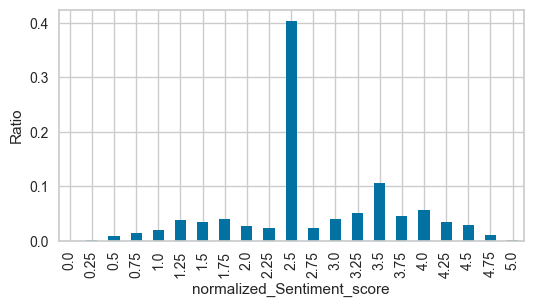

In [71]:
plot_labels(df2, label = "normalized_Sentiment_score")

2.2 Functions to produce normalized sentiment score and rating score

Bins the data on 0.25 intervals. Anything from 1.0 is considered bad, will be labelled as 0. In order to bring data from continuous to labels

In [72]:
### this is when the labelling starts


def label_score(row):
    score = row['normalized_Sentiment_score']
    if score < 1.5:
        return 0
    elif score >= 1.5 and score < 2.5:
        return 1
    elif score == 2.5:
        return 2
    elif score >= 2.75 and score < 4.0:
        return 3
    else:  # for 4.0 and lower
        return 4

df2['label'] = df2.apply(label_score, axis=1)


In [73]:
df2.describe()

,user,message_id,label,Sentiment_Score,normalized_Sentiment_score
count,1.102239e+06,1.102239e+06,1.102239e+06,1.102239e+06,1.102239e+06
mean,2.584895e+05,3.395174e+07,2.237728e+00,9.941479e-02,2.747130e+00
std,1.985429e+05,1.870664e+07,1.082337e+00,3.587670e-01,8.959103e-01
min,2.000000e+00,4.074870e+05,0.000000e+00,-9.805000e-01,0.000000e+00
25%,1.122360e+05,1.673801e+07,2.000000e+00,0.000000e+00,2.500000e+00
50%,2.188110e+05,3.508098e+07,2.000000e+00,0.000000e+00,2.500000e+00
75%,3.819180e+05,4.850945e+07,3.000000e+00,3.818000e-01,3.500000e+00
max,9.135790e+05,7.063000e+07,4.000000e+00,9.829000e-01,5.000000e+00


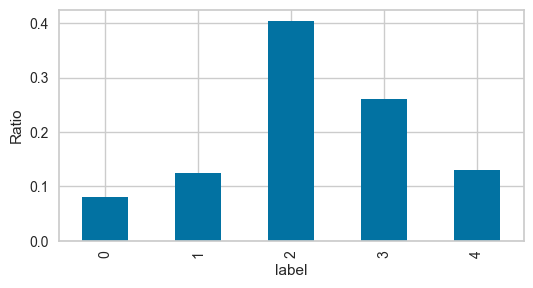

In [74]:
plot_labels(df2, label = "label")

In [75]:
len(df2[df2['label']==2])

445101

In [76]:
df2['label'].value_counts().sort_values()

0     88312
1    136991
4    143813
3    288022
2    445101
Name: label, dtype: int64

## 2. Dealing with imbalanced data

In [13]:
RANDOM_SEED = 42
label_count_0, label_count_1, label_count_4, label_count_3, label_count2 = df2['label'].value_counts().sort_values()

label_0 = df2[df2['label'] == 0]
label_1 = df2[df2['label'] == 1]
label_2 = df2[df2['label'] == 2]
label_3 = df2[df2['label'] == 3]
label_4 = df2[df2['label'] == 4]

print('Bad:', label_0.shape)
print('Nay:', label_1.shape)
print('Average:', label_2.shape)
print('Good:', label_3.shape)
print('Awesome:', label_4.shape)
print('Nay-lowest-count:', label_count_0)

### because label 0 is the lowest:
label_1_under = label_1.sample(label_count_0, random_state = RANDOM_SEED)
label_2_under = label_2.sample(label_count_0, random_state = RANDOM_SEED)
label_3_under = label_3.sample(label_count_0, random_state = RANDOM_SEED)
label_4_under = label_4.sample(label_count_0, random_state = RANDOM_SEED)

cleaned_df = pd.concat([label_0, label_1_under, label_2_under, label_3_under, label_4_under], axis = 0)

NameError: name 'df2' is not defined

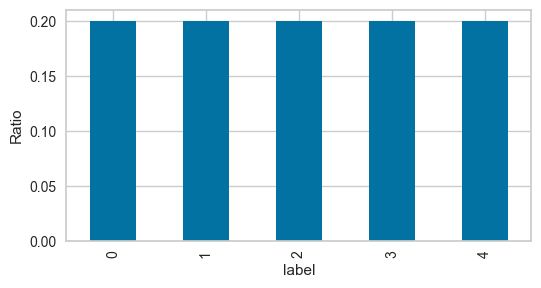

88312
88312
88312
88312
88312


In [81]:
plot_labels(cleaned_df, label = "label")
print(len(cleaned_df[cleaned_df['label']==0]))
print(len(cleaned_df[cleaned_df['label']==1]))
print(len(cleaned_df[cleaned_df['label']==2]))
print(len(cleaned_df[cleaned_df['label']==3]))
print(len(cleaned_df[cleaned_df['label']==4]))

In [85]:
cleaned_df.tail()

,symbol,message,datetime,user,message_id,Date,Time,label,Sentiment_Score,Sentiment,normalized_Sentiment_score
2561123,NFLX,love nflx think take world terms broadcasting,2011-01-27 16:41:26,44301,2656651,2011-01-27,16:41:26,4,0.6369,Positive,4.00
658369,AAPL,aapl whatever saying holds true lucky high odds going time odds way,2016-12-30 20:00:47,270464,70592734,2016-12-30,20:00:47,4,0.6808,Positive,4.25
942124,AAPL,aapl best launch ever countries ever phone still hard get new product horizon built work,2014-12-22 15:22:00,209265,30536752,2014-12-22,15:22:00,4,0.5859,Positive,4.00
1769436,FB,fb bought 100 shares 98 14 sold 110 58 felt bad went 117 I glad cashed picking another good entry,2016-02-09 18:49:12,419232,49440933,2016-02-09,18:49:12,4,0.5574,Positive,4.00
1041205,AAPL,aapl positive net cash flow ppl buying investor would sell,2014-01-31 17:38:51,71738,19613831,2014-01-31,17:38:51,4,0.5574,Positive,4.00


In [94]:
# Define date range to remove
start_date = '2009-01-01'
end_date = '2014-12-31'

#cleaned_df(cleaned_df['Date'] >= start_date)

# Select rows where 'Date' is within the specified range
df_train = cleaned_df[(cleaned_df['Date'] >= start_date) & (cleaned_df['Date'] <= end_date)]
df_val = cleaned_df[~((cleaned_df['Date'] >= start_date) & (cleaned_df['Date'] <= end_date))]


In [92]:
#df_train = cleaned_df.copy()

In [95]:
## Checking the data samoples spread in normalized_sentiment_score
df_train["normalized_Sentiment_score"].value_counts(normalize=False)

2.50    39416
1.25    18312
4.00    17513
3.50    16610
1.75    13515
4.25    11023
1.50    10830
1.00     9908
2.00     9286
4.50     9002
3.25     7780
2.25     7517
3.75     7078
0.75     6320
3.00     6012
0.50     3777
2.75     3502
4.75     3005
0.25      875
5.00       48
0.00       21
Name: normalized_Sentiment_score, dtype: int64

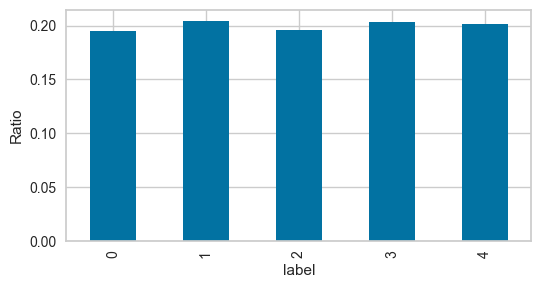

39213
41148
39416
40982
40591


In [96]:
plot_labels(df_train, label = "label")
print(len(df_train[df_train['label']==0]))
print(len(df_train[df_train['label']==1]))
print(len(df_train[df_train['label']==2]))
print(len(df_train[df_train['label']==3]))
print(len(df_train[df_train['label']==4]))

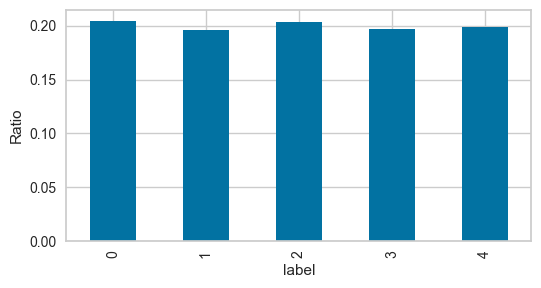

49099
47164
48896
47330
47721


In [99]:
plot_labels(df_val, label = "label")
print(len(df_val[df_val['label']==0]))
print(len(df_val[df_val['label']==1]))
print(len(df_val[df_val['label']==2]))
print(len(df_val[df_val['label']==3]))
print(len(df_val[df_val['label']==4]))

In [97]:
with open('011223_df_train_df_val_dataset_message_with_Normalised_Sentiment_Score', 'wb') as file:
    pickle.dump((df_train, df_val), file)


In [98]:
import pickle

with open('011223_df_train_df_val_dataset_message_with_Normalised_Sentiment_Score', 'rb') as file:
    df_train, df_val = pickle.load(file)

## 3. Model building**

Splitting balanced data into df_train, df_dev, df_test

This is an important step of the model development process where data is separated into different subsets to train and evaluate the performance of machine learning models. 

Objectives:

Function to perform the data split checks to ensure its balanced

In [1]:
import pickle

with open('021223_Output_Combined_FAANG_percentage_2.2_w_sentiment_labels', 'rb') as file:
    data = pickle.load(file)

In [2]:
data

,symbol,message,datetime,user,message_id,Date,Time,label,encoded_labels,Bearish,Nay,Neutral,Bullish,To the Moon!!
0,AAPL,peak profit last 6 expired option alerts aapl ...,2020-07-19 09:49:35,1442893,229008387,2020-07-19,09:49:35,1,2,0.000034,0.000191,0.000602,0.998740,0.000433
1,AAPL,aapl jul 17 382 50 calls option volume 144 44 ...,2020-07-19 09:47:26,1442893,229008357,2020-07-19,09:47:26,1,2,0.999616,0.000251,0.000069,0.000046,0.000019
2,AAPL,tsla market true bubble territory profitable c...,2020-07-19 09:01:25,1115913,229007569,2020-07-19,09:01:25,1,2,0.000016,0.000021,0.000015,0.000268,0.999680
3,AAPL,aapl analyzed 26 analysts buy consensus 86 ana...,2020-07-19 08:13:00,47688,229006733,2020-07-19,08:13:00,1,2,0.000727,0.271107,0.650643,0.077305,0.000218
4,AAPL,aapl new article dogs dow august 4 adopt ignore,2020-07-19 07:54:05,1555408,229006403,2020-07-19,07:54:05,1,2,0.000508,0.998982,0.000354,0.000119,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566821,NFLX,get long nflx stop 44 50,2009-09-22 12:21:48,78,591710,2009-09-22,12:21:48,0,1,0.000079,0.999566,0.000236,0.000070,0.000050
2566822,NFLX,nflx awards 1 mill better movie search engine ...,2009-09-21 17:44:20,384,589527,2009-09-21,17:44:20,0,1,0.000010,0.000029,0.000023,0.000652,0.999286
2566823,NFLX,39 mbt 47 swapped nflx,2009-09-21 15:48:19,78,588855,2009-09-21,15:48:19,0,1,0.000032,0.000056,0.999642,0.000220,0.000050
2566824,NFLX,long nflx,2009-09-21 15:39:57,78,588781,2009-09-21,15:39:57,0,1,0.000010,0.000020,0.999809,0.000126,0.000034


In [7]:
# Define date range to remove
start_date = '2017-01-01'
end_date = '2020-12-31'


# Convert the 'date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Convert strings to datetime
start_date = pd.to_datetime(start_date)
end_date = pd.to_datetime(end_date)

# Remove rows within the specified date range, end data will be from 01 Jan 2009 to 31 Dec 2014
data = data[~((data['Date'] >= start_date) & (data['Date'] <= end_date))]

In [8]:
data

,symbol,message,datetime,user,message_id,Date,Time,label,encoded_labels,Bearish,Nay,Neutral,Bullish,To the Moon!!
658149,AAPL,amzn aapl nvda hope work otherwise 401k turn 101k bah dum chee,2016-12-31 23:44:47,786342,70629996,2016-12-31,23:44:47,0,1,0.000024,0.000178,0.000585,0.998890,0.000323
658150,AAPL,aapl apple confirms removal home button iphones coming 2017 appleinsider,2016-12-31 23:43:20,4553,70629981,2016-12-31,23:43:20,0,1,0.000011,0.000020,0.999847,0.000088,0.000034
658151,AAPL,aapl,2016-12-31 23:39:54,116603,70629921,2016-12-31,23:39:54,0,1,0.000014,0.000015,0.999806,0.000120,0.000045
658152,AAPL,aapl best wishes 2017,2016-12-31 23:37:51,422677,70629899,2016-12-31,23:37:51,0,1,0.000020,0.000041,0.000024,0.000413,0.999502
658153,AAPL,aapl bottrigger trend signal issued formal buy alert aapl although publication advanced buy sign,2016-12-31 23:20:30,783862,70629704,2016-12-31,23:20:30,0,1,0.000021,0.000170,0.000174,0.998129,0.001506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566821,NFLX,get long nflx stop 44 50,2009-09-22 12:21:48,78,591710,2009-09-22,12:21:48,0,1,0.000079,0.999566,0.000236,0.000070,0.000050
2566822,NFLX,nflx awards 1 mill better movie search engine could amount beat gs algo 39,2009-09-21 17:44:20,384,589527,2009-09-21,17:44:20,0,1,0.000010,0.000029,0.000023,0.000652,0.999286
2566823,NFLX,39 mbt 47 swapped nflx,2009-09-21 15:48:19,78,588855,2009-09-21,15:48:19,0,1,0.000032,0.000056,0.999642,0.000220,0.000050
2566824,NFLX,long nflx,2009-09-21 15:39:57,78,588781,2009-09-21,15:39:57,0,1,0.000010,0.000020,0.999809,0.000126,0.000034


In [9]:
with open('021223_Message_w_label_2009_to_2016', 'wb') as file:
    pickle.dump((data), file)
